In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")
data= pd.read_csv('ifood_df.csv')

# DESCRIPTIVE ANALYSIS

In [17]:
nulls = data.isnull()
nulls.sum() # No missing values
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [5]:
# Descriptive statistics (location, dispersion)
#data.info()
dataDesc = data[['Income', 'Age', 'NumWebPurchases', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'NumWebVisitsMonth', 'Customer_Days']]
descStat = dataDesc.describe()

In [6]:
kidos = data[['Kidhome', 'Teenhome']]
martial = data[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']]
edu = data[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']]
cmps = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

# BARPLOTS

In [ ]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

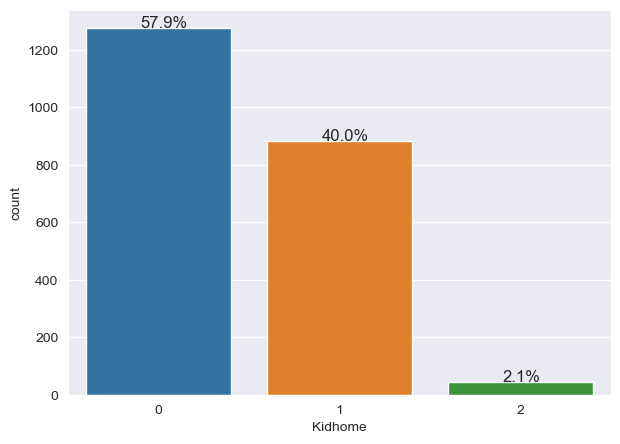

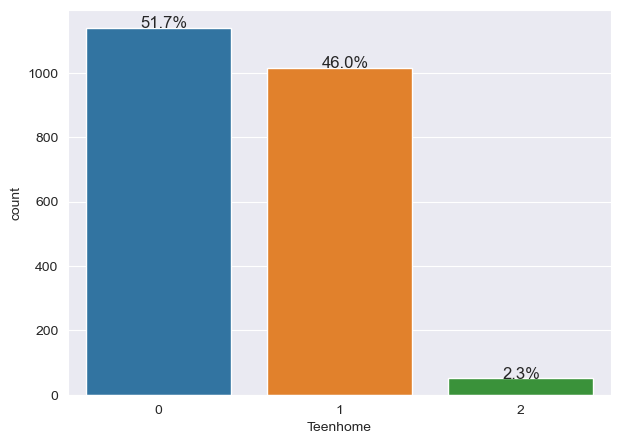

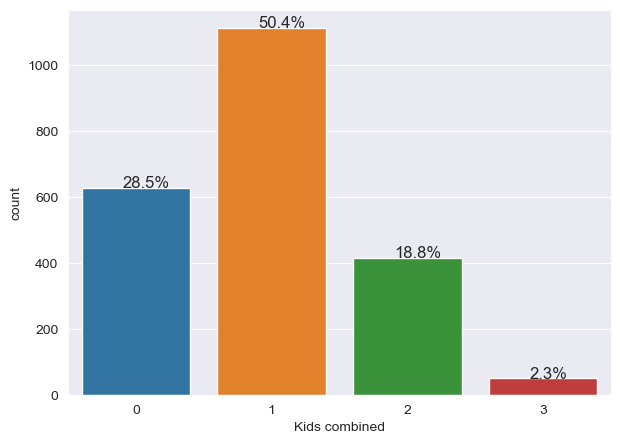

In [7]:
# Kids
cols = kidos.columns
for i in kidos:
    plt.figure(figsize=(7,5))
    ax = sns.countplot(x=kidos[i])
    without_hue(ax, kidos[i])
allkids = kidos['Kidhome'] + kidos['Teenhome']
plt.figure(figsize=(7,5))
ax = sns.countplot(x=allkids)
plt.xlabel('Kids combined')
without_hue(ax, allkids)

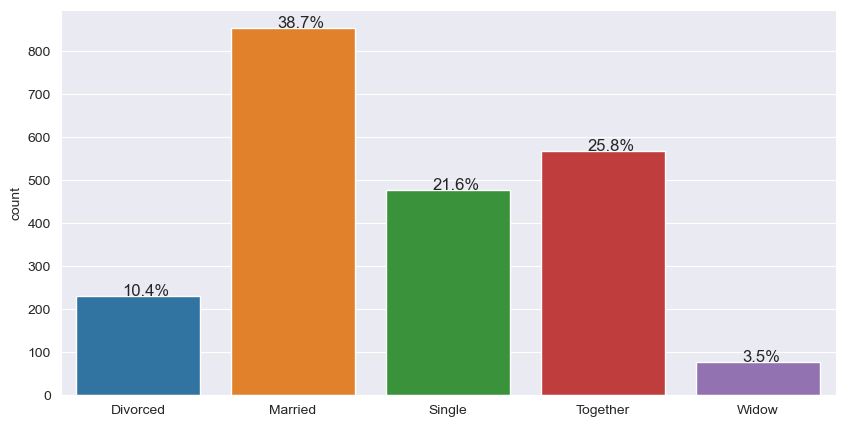

In [8]:
# cols = martial.columns
# for i in martial:
#     plt.figure(figsize=(7,5))
#     ax = sns.countplot(x=martial[i])
#     plt.xticks([0,1], ['False', 'True'])
#     without_hue(ax, martial[i])
martialcount = np.sum(martial).to_frame()
martialcount = martialcount.rename(columns = {0: 'count'})
martialcount['level'] = ['Divorced', 'Married', 'Single', 'Together', 'Widow']
martialcount['per'] = round(martialcount['count'] / 2205 * 100, 2)

plt.figure(figsize=(10,5))
ax = sns.barplot(x = martialcount['level'], y=martialcount['count'])
# Percenty
i = 0 
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate('{:.1f}%'.format(martialcount.iloc[i,2]), (x, y), size = 12)
    i += 1
ax.set_xlabel('')
plt.show()

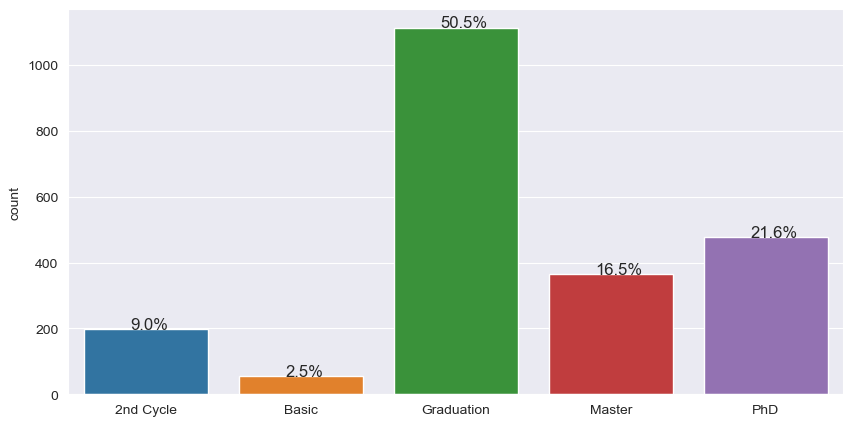

In [9]:
educount = np.sum(edu).to_frame()
educount = educount.rename(columns = {0: 'count'})
educount['level'] = ['2nd Cycle', 'Basic', 'Graduation', 'Master', 'PhD']
educount['per'] = round(educount['count'] / 2205 * 100, 2)

plt.figure(figsize=(10,5))
ax = sns.barplot(x = educount['level'], y=educount['count'])
# Percenty
i = 0 
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate('{:.1f}%'.format(educount.iloc[i,2]), (x, y), size = 12)
    i += 1
ax.set_xlabel('')
plt.show()

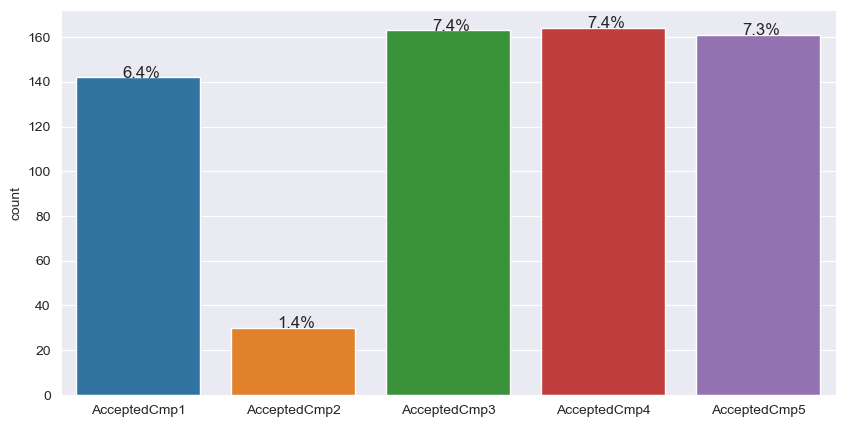

In [10]:
cmpscount = np.sum(cmps).to_frame()
cmpscount = cmpscount.rename(columns = {0: 'count'})
cmpscount['level'] = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cmpscount['per'] = round(cmpscount['count'] / 2205 * 100, 2)

plt.figure(figsize=(10,5))
ax = sns.barplot(x = cmpscount['level'], y=cmpscount['count'])
# Percenty
i = 0 
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate('{:.1f}%'.format(cmpscount.iloc[i,2]), (x, y), size = 12)
    i += 1
ax.set_xlabel('')
plt.show()

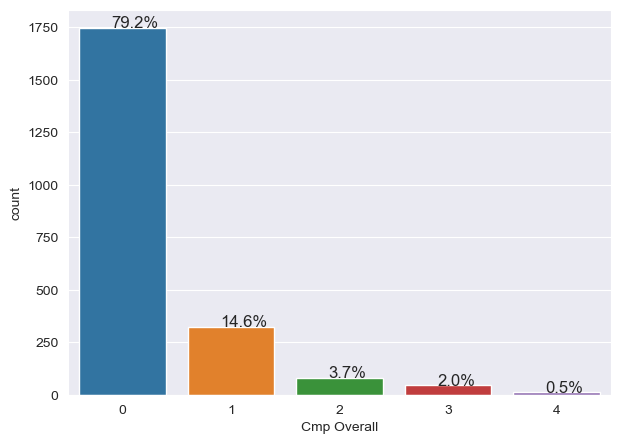

In [11]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x=data['AcceptedCmpOverall'])
plt.xlabel('Cmp Overall')
without_hue(ax, allkids)

# BOXPLOTS + OUTLIER DETECTION

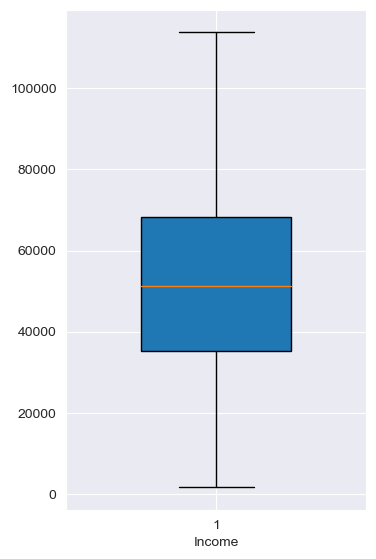

33085.0 117908.5 -14431.5
The following are the outliers in the boxplot:[]
0


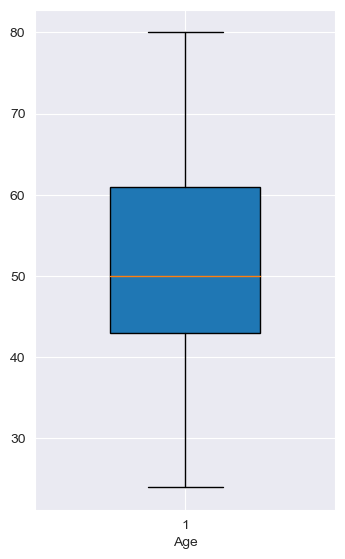

18.0 88.0 16.0
The following are the outliers in the boxplot:[]
0


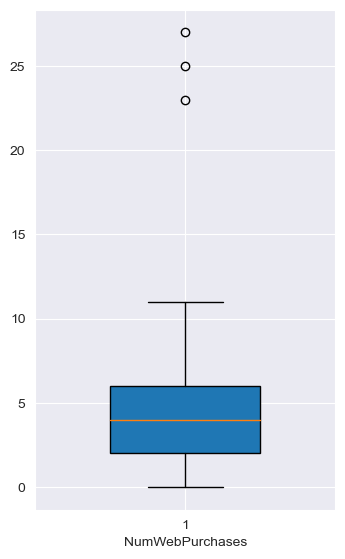

4.0 12.0 -4.0
The following are the outliers in the boxplot:[[1780 1872 1949]]
3


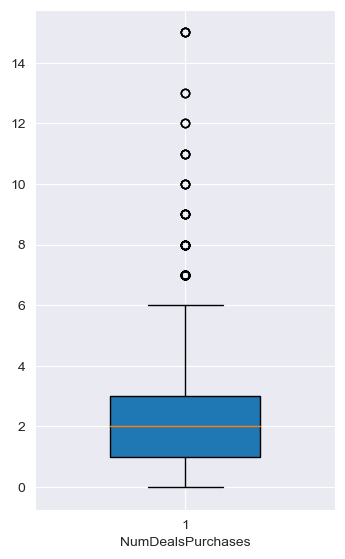

2.0 6.0 -2.0
The following are the outliers in the boxplot:[[  20   23   31   45   50   64  137  186  194  199  200  202  217  230
   250  273  299  308  347  354  366  387  402  415  438  455  462  492
   512  515  538  562  564  609  627  670  698  708  711  712  752  767
   768  785  788  793  835  841  843  856  868  871  892  920  944  949
   957  985  992 1002 1022 1028 1029 1040 1047 1051 1061 1082 1089 1105
  1127 1136 1141 1225 1246 1253 1285 1288 1304 1321 1339 1341 1352 1355
  1365 1379 1436 1455 1462 1465 1468 1472 1475 1477 1478 1481 1482 1500
  1506 1510 1531 1536 1544 1549 1563 1594 1598 1601 1610 1617 1632 1634
  1677 1689 1762 1777 1785 1806 1813 1820 1839 1847 1867 1888 1889 1958
  1960 1987 1996 2015 2018 2025 2058 2078 2111 2129 2165 2172 2177 2192
  2193 2201]]
142


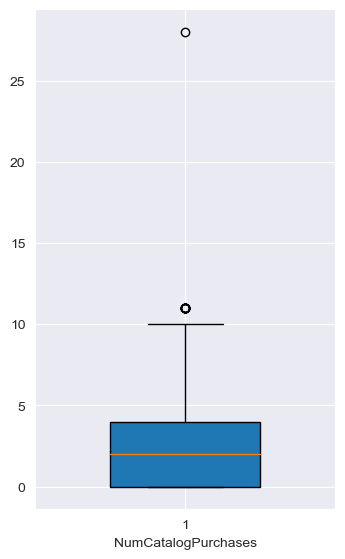

4.0 10.0 -6.0
The following are the outliers in the boxplot:[[   0   20   37   51   62   78   95  164  176  204  234  274  349  407
   453  468  489  542  569  574  609  618  729  730  744  757  804  872
   874  875  890  891  901  914  964 1046 1192 1222 1232 1361 1388 1396
  1427 1440 1467 1479 1538 1559 1643 1654 1709 1719 1802 1815 1819 1824
  1843 1864 1880 1914 1932 1942 2030 2061 2086 2127 2154]]
67


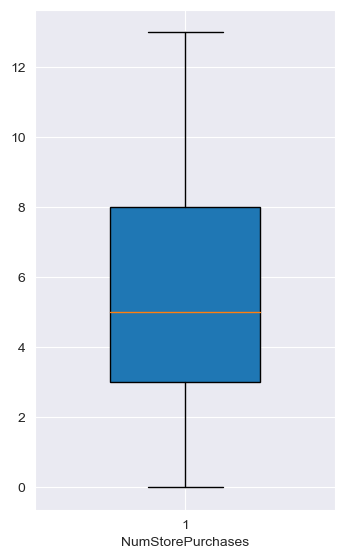

5.0 15.5 -4.5
The following are the outliers in the boxplot:[]
0


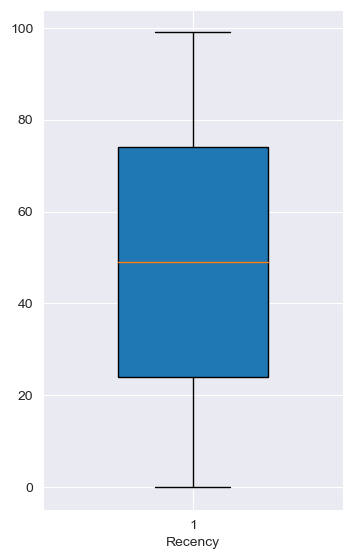

50.0 149.0 -51.0
The following are the outliers in the boxplot:[]
0


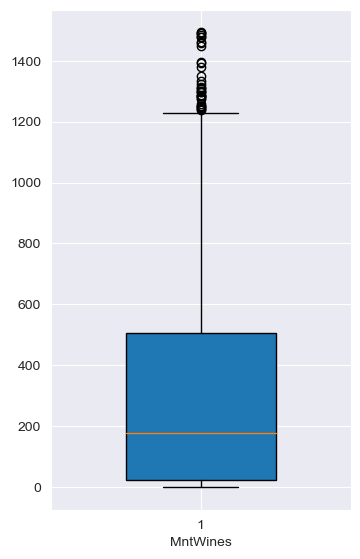

483.0 1231.5 -700.5
The following are the outliers in the boxplot:[[ 102  150  281  407  413  449  480  498  506  526  542  804  806  850
   897  917  967  970  981 1032 1171 1433 1463 1467 1552 1616 1723 1896
  1927 1935 1966 2039 2066 2095]]
34


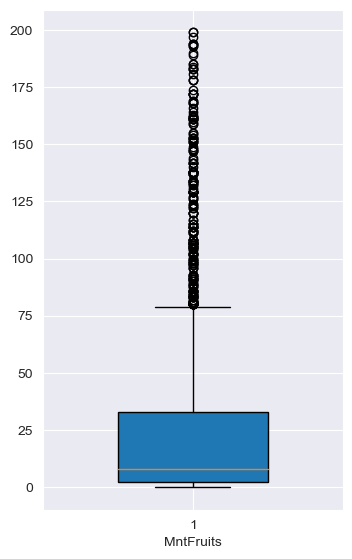

31.0 79.5 -44.5
The following are the outliers in the boxplot:[[   0   17   27   42   49   66   70   71   93   94   98  100  101  107
   108  117  122  156  185  188  215  227  229  234  238  252  262  263
   272  274  278  291  320  330  334  336  343  373  375  384  401  409
   430  442  446  489  492  494  496  502  511  520  539  540  544  546
   574  575  597  612  614  619  624  626  628  634  639  653  658  662
   667  669  681  685  698  703  707  719  729  733  734  742  747  751
   770  778  783  792  805  815  826  835  864  877  882  885  904  907
   908  909  920  922  940  945  950  954  964  966  996 1009 1010 1011
  1012 1027 1030 1042 1046 1051 1055 1060 1069 1077 1080 1114 1124 1131
  1137 1138 1139 1152 1159 1179 1181 1186 1196 1222 1237 1245 1260 1268
  1269 1292 1299 1315 1334 1337 1364 1388 1396 1404 1419 1426 1427 1430
  1444 1455 1459 1461 1463 1467 1470 1482 1483 1485 1495 1496 1501 1512
  1527 1529 1534 1538 1547 1564 1573 1576 1587 1590 1597 1602 1605 1623
  

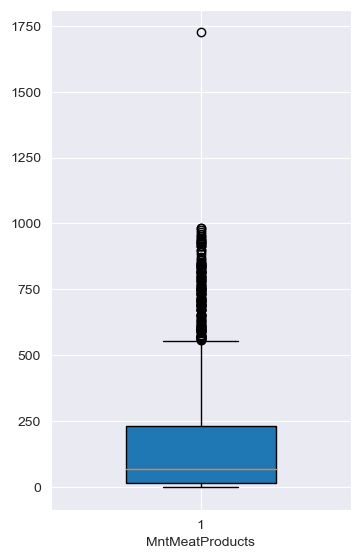

216.0 556.0 -308.0
The following are the outliers in the boxplot:[[  20   27   47   70   71   82   95  107  117  124  129  131  184  215
   226  234  274  278  298  322  323  340  343  349  373  398  407  409
   439  473  498  502  529  540  544  574  575  592  609  616  618  623
   626  632  667  669  703  706  715  730  733  746  770  778  794  800
   817  825  832  858  864  865  886  890  894  907  922  923  946  966
   967  968 1010 1011 1014 1032 1046 1064 1070 1093 1109 1113 1114 1133
  1143 1159 1184 1186 1193 1239 1241 1249 1260 1268 1278 1280 1290 1329
  1337 1361 1418 1419 1426 1427 1433 1451 1461 1467 1488 1495 1496 1503
  1517 1547 1556 1557 1564 1576 1585 1587 1623 1645 1646 1660 1684 1687
  1695 1696 1697 1717 1719 1775 1782 1783 1787 1801 1802 1815 1824 1826
  1827 1832 1843 1861 1864 1865 1901 1919 1926 1927 1932 1939 1956 1964
  1966 1984 1986 2015 2054 2077 2099 2118 2130 2134 2143 2154 2157 2160
  2178 2180]]
170


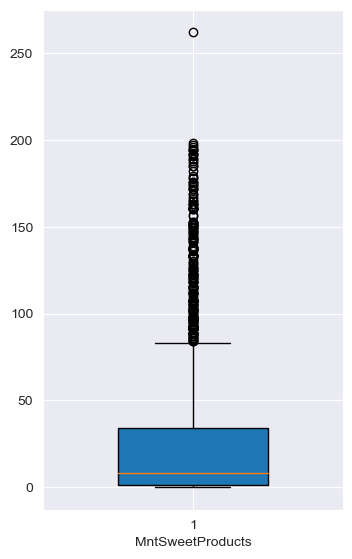

33.0 83.5 -48.5
The following are the outliers in the boxplot:[[   0   11   38   47   51   52   59   71   82   93   98  108  120  148
   164  179  184  189  190  198  201  218  226  227  238  252  254  262
   264  273  274  291  320  323  328  330  334  340  343  351  373  375
   394  401  406  409  412  415  430  439  442  444  446  453  496  527
   529  537  540  544  546  574  575  609  614  616  632  643  653  654
   660  662  667  685  695  696  698  703  716  727  732  735  747  759
   760  778  783  789  794  797  805  815  832  855  864  865  877  880
   904  908  920  936  940  950  954  963  967  990  996 1010 1011 1014
  1030 1047 1055 1060 1070 1080 1085 1091 1093 1131 1133 1137 1148 1152
  1159 1179 1202 1215 1222 1233 1237 1239 1245 1261 1278 1283 1292 1301
  1311 1312 1313 1315 1342 1344 1407 1419 1421 1433 1459 1467 1470 1473
  1474 1481 1482 1483 1485 1487 1488 1501 1503 1517 1527 1538 1547 1566
  1576 1581 1585 1597 1601 1626 1645 1648 1654 1673 1682 1685 1697 1703
  

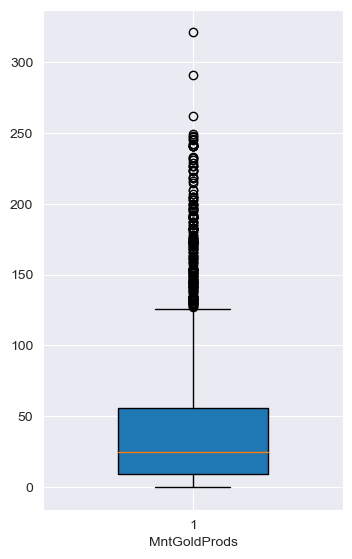

47.0 126.5 -61.5
The following are the outliers in the boxplot:[[  17   42   49   51   57   82   89  115  116  117  122  167  170  185
   196  213  229  230  234  238  252  256  262  265  267  273  278  319
   328  330  348  351  361  370  412  414  446  473  476  486  504  569
   575  608  618  622  625  626  628  631  643  653  661  682  688  695
   698  701  703  707  709  716  725  732  737  744  751  759  767  768
   777  788  811  815  817  819  825  826  835  854  865  872  875  876
   885  892  901  907  914  920  923  926  936  945  959  964  967  982
   987  990 1014 1020 1023 1028 1032 1041 1046 1047 1051 1064 1065 1095
  1097 1124 1175 1234 1236 1246 1258 1260 1264 1268 1280 1288 1299 1301
  1302 1304 1307 1311 1330 1373 1396 1418 1423 1440 1442 1448 1449 1455
  1488 1496 1528 1534 1594 1616 1623 1632 1648 1674 1689 1703 1717 1721
  1722 1762 1774 1780 1788 1791 1797 1798 1801 1812 1813 1843 1850 1851
  1864 1865 1887 1888 1889 1895 1917 1920 1935 1949 1956 1998 2005 2007
 

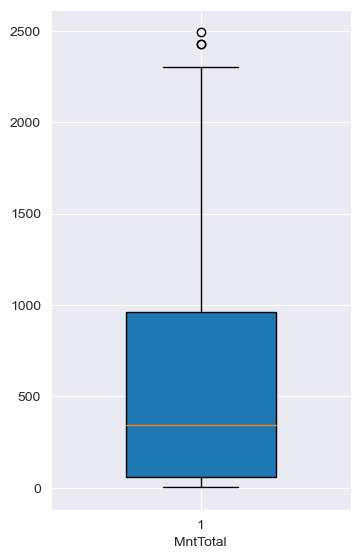

908.0 2326.0 -1306.0
The following are the outliers in the boxplot:[[1159 1467 1547]]
3


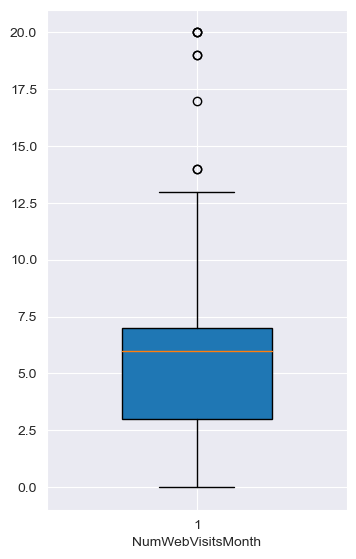

4.0 13.0 -3.0
The following are the outliers in the boxplot:[[   9  754  961 1022 1225 1307 1499 1820 2181]]
9


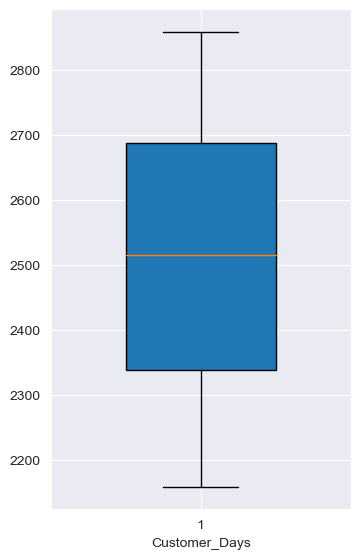

349.0 3211.5 1815.5
The following are the outliers in the boxplot:[]
0


In [13]:

#cols = cols.delete('Gene ID', 'Gene Name')
# fig, axs = plt.subplots(1,20)

# axs.boxplot(data4[2:22])
cols = dataDesc.columns
for i in cols:
    arr1 = dataDesc[i].to_numpy()
    fig = plt.figure(figsize = (3,5))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(dataDesc[i], widths=0.5, patch_artist='blue')
    ax.set_xlabel(i)
    plt.show()
    
    # finding the 1st quartile
    q1 = np.quantile(dataDesc[i], 0.25)
    
    # finding the 3rd quartile
    q3 = np.quantile(dataDesc[i], 0.75)
    med = np.median(dataDesc[i])

    # finding the iqr region
    iqr = q3-q1
    
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    print(iqr, upper_bound, lower_bound)
    outliers = np.asarray(np.where((arr1 <= lower_bound) | (arr1 >= upper_bound)))
    print('The following are the outliers in the boxplot:{}'.format(outliers))
    print(outliers.shape[1])

# HISTOGRAMS

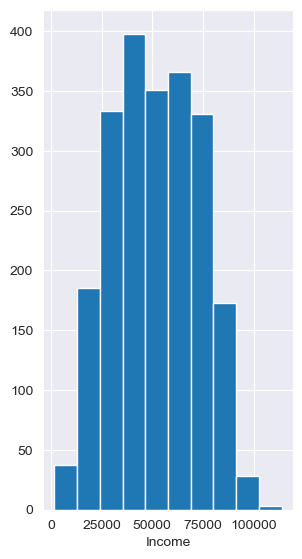

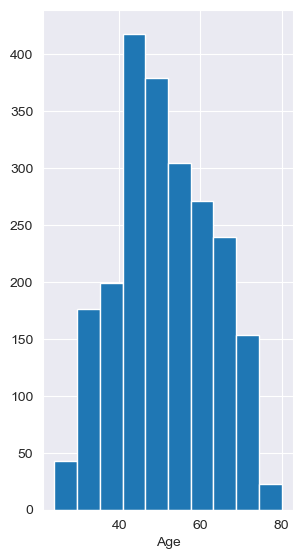

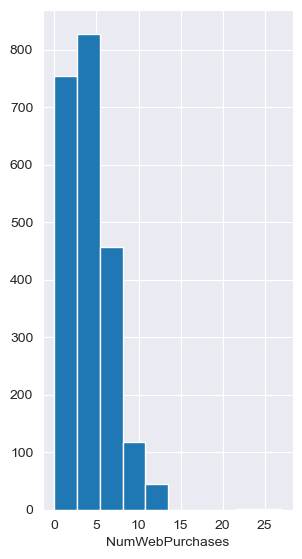

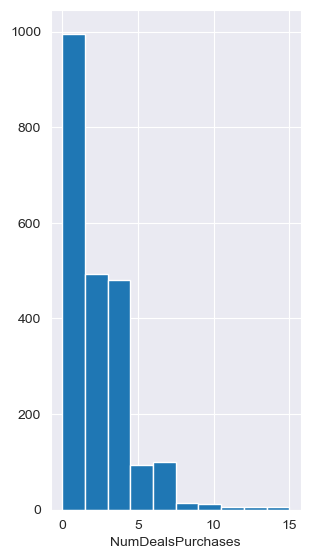

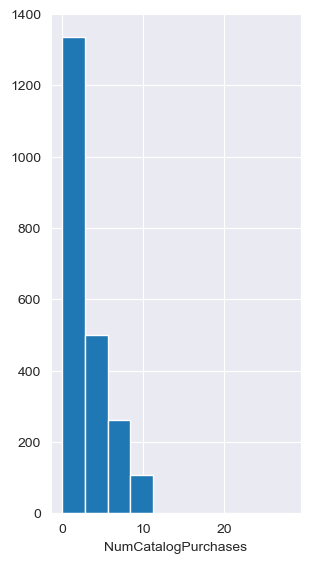

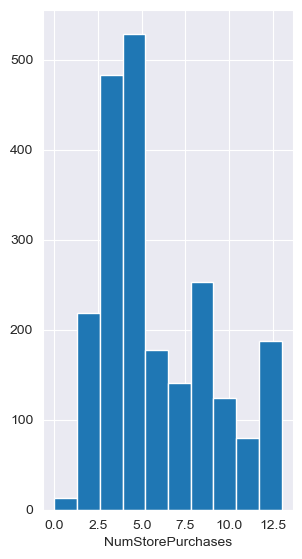

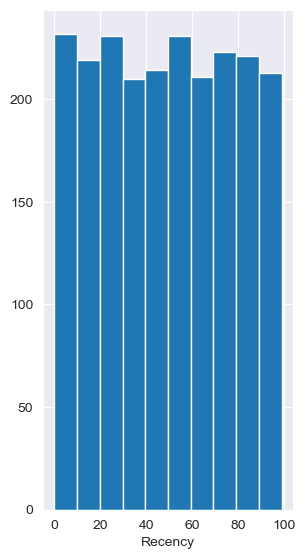

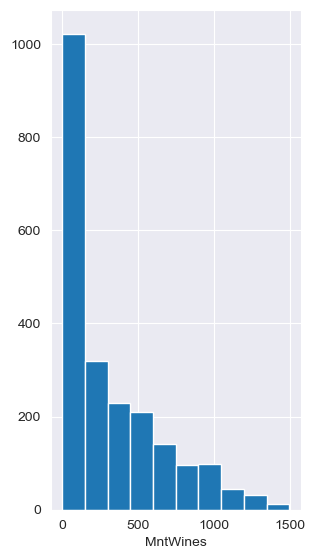

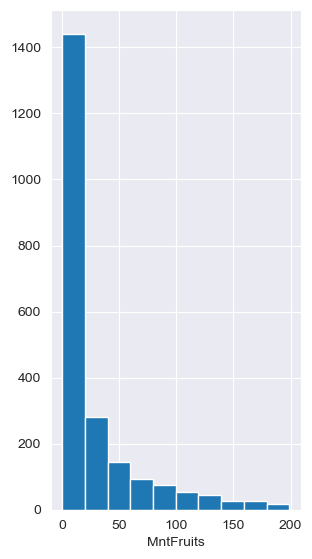

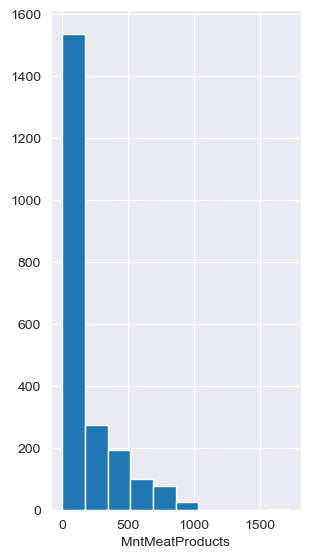

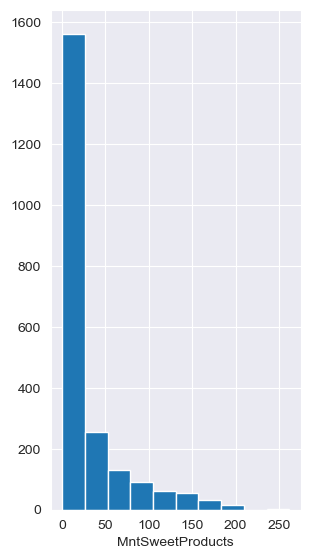

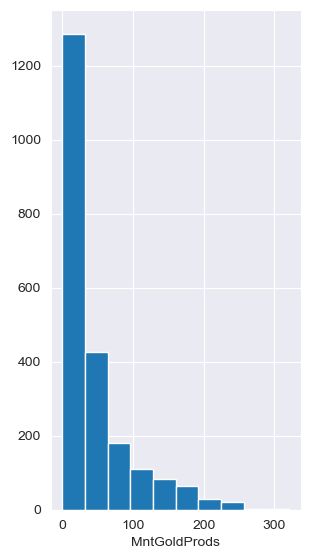

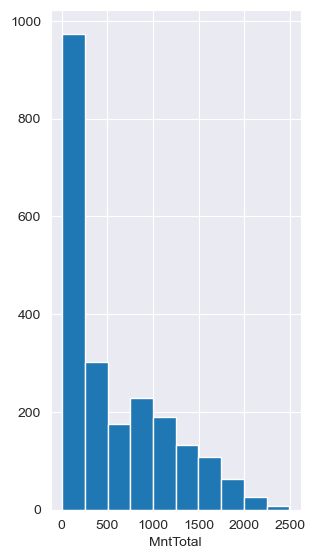

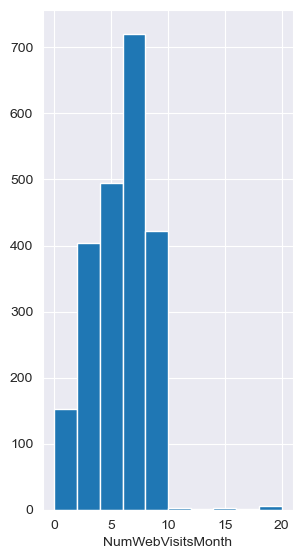

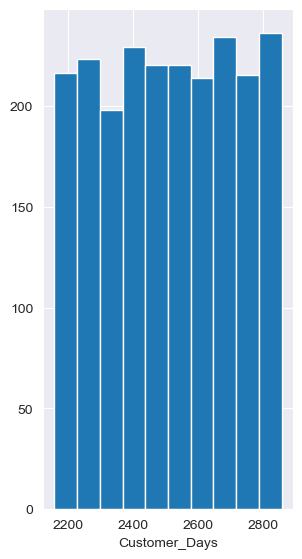

In [14]:
sns.set_style("darkgrid")
for i in cols:
    fig = plt.figure(figsize = (2.5,5))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.hist(dataDesc[i])
    ax.set_xlabel(i)
    plt.show()

# NORMALITY TESTING

In [15]:
from scipy.stats import shapiro
cols = data.columns
for i in cols:
    print(shapiro(data[i]))


ShapiroResult(statistic=0.9844836592674255, pvalue=9.196649213385252e-15)
ShapiroResult(statistic=0.6754016280174255, pvalue=0.0)
ShapiroResult(statistic=0.6937963962554932, pvalue=0.0)
ShapiroResult(statistic=0.9543596506118774, pvalue=1.0523436523122572e-25)
ShapiroResult(statistic=0.8399023413658142, pvalue=1.5372244153643243e-42)
ShapiroResult(statistic=0.6906068325042725, pvalue=0.0)
ShapiroResult(statistic=0.7446695566177368, pvalue=0.0)
ShapiroResult(statistic=0.7096991539001465, pvalue=0.0)
ShapiroResult(statistic=0.689237117767334, pvalue=0.0)
ShapiroResult(statistic=0.7708150148391724, pvalue=0.0)
ShapiroResult(statistic=0.747410774230957, pvalue=0.0)
ShapiroResult(statistic=0.9076703786849976, pvalue=1.3047936784604504e-34)
ShapiroResult(statistic=0.8423508405685425, pvalue=2.6316385160020065e-42)
ShapiroResult(statistic=0.9014685153961182, pvalue=1.6727116725434737e-35)
ShapiroResult(statistic=0.9286952018737793, pvalue=3.4993347753357516e-31)
ShapiroResult(statistic=0.2862

c:\Users\piotr\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
